<a id ='9'> </a>
<div class="alert alert-block alert-danger"><h2 style="text-align:center;color:black"> 📱 Smartphone Price Analysis + EDA 📊 </h2> </div> 

<div class="alert alert-block alert-warning"><h2 style="text-align:Center;color:black">Table of Content </h2> </div>

1. [Import Lib](#1)
1. [Load Data](#2)
1. [Basic Analysis](#3)
1. [Missing Values](#4)
1. [Exploratory Data Analysis](#5)
    1. [Brand vs Number of models](#6)
    1. [Brand vs Avg. Price](#7)
    1. [Brand vs Avg. Rating](#8)
    1. [5G or Not](#9)
    1. [Processor vs Avg. Price](#10)
    1. [Battery vs Avg. Price](#11)
    1. [Battery vs Brand](#12)
    1. [Fast Charging Available](#13)
    1. [Number of Rear cameras vs Avg. Price](#14)
    1. [Rear camera Resolution vs Avg. Price](#15)
    1. [Operating System vs Brand](#16)

<a id ='1'> </a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Import Lib </h2> </div> 

In [1]:
# basic
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from missingno import missingno as mno

# Warnings
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'missingno'

<a id ='2'> </a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Import Data </h2> </div> 

In [ ]:
# import data
data = pd.read_csv('/kaggle/input/real-world-smartphones-dataset/smartphones.csv')

<a id ='3'> </a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Basic Analysis </h2> </div> 

In [ ]:
# shape of the data
print(data.shape)

The data contains **980 rows** and **22 columns**.

In [ ]:
# display top of the data
data.head()

In [ ]:
# Information on every column
data.info()

In [ ]:
# Describe every column
data.describe()

<a id ='4'> </a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Missing Values </h2> </div> 

In [2]:
# sum of missing values in each column
data.isna().sum()

NameError: name 'data' is not defined

In [3]:
# plot for Number of rows in each column
# figsize
plt.figure(figsize=(14,6),dpi=200)

# plot
mno.bar(data)   # Using missingno 

# labels
plt.title('Number of rows in each column',fontsize=35)
plt.tight_layout()
plt.show()

NameError: name 'mno' is not defined

<Figure size 2800x1200 with 0 Axes>

The columns with missing value are **avg_rating, processor_brand, num_cores, processor_speed, battery_capacity, fast_charging, os, primary_camera_front**.

<a id ='5'> </a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Exploratory Data Analysis </h2> </div> 

<a id ='6'> </a>
<div class="alert alert-block alert-warning"><h3 style="text-align:center;color:black"> Brand vs Number of models </h3> </div> 

In [ ]:
# Number of models for each brand 

brand_count = data.brand_name.value_counts().reset_index()
brand_count.head()

In [ ]:
# plot for number of modles fot top 20 brands
# Figsize
plt.figure(figsize=(14,5),dpi=200)

# Barplot
ax = sns.barplot(brand_count.head(20),x='index',y='brand_name',palette='icefire')
ax.bar_label(ax.containers[0])

# Labels
plt.title('Number of models for top 20 Brands',fontsize=20)
plt.xlabel('Brand Name',fontsize=13)
plt.ylabel('Number of Models',fontsize=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<a id ='7'> </a>
<div class="alert alert-block alert-warning"><h3 style="text-align:center;color:black"> Brand vs Avg. Price </h3> </div> 

In [ ]:
# average price for each brand 

avg_price = data.groupby('brand_name')['price'].mean().reset_index()
avg_price = avg_price.sort_values(by='price',ascending=False)
avg_price.head()

In [ ]:
# plot for top 10 most expensive brands
# figsize
plt.figure(figsize=(14,6),dpi=300)

# Plot
ax = sns.barplot(data=avg_price.head(10),x='brand_name',y='price',palette='icefire',width=0.6)
ax.bar_label(ax.containers[0])

# Labels
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Average Price',fontsize=15)
plt.title('Top 10 Most Expensive Brands',fontsize=25)
plt.tight_layout()
plt.show()

<a id ='8'> </a>
<div class="alert alert-block alert-warning"><h3 style="text-align:center;color:black"> Brand vs Avg. Rating </h3> </div> 

In [ ]:
# average rating for each brand 

avg_rating = data.groupby('brand_name')['avg_rating'].mean().reset_index()
avg_rating = avg_rating.sort_values(by='avg_rating',ascending=False)
avg_rating.head()

In [ ]:
# Barplot for average rating for each brand
# figsize
plt.figure(figsize=(14,6),dpi=400)

# Plot
sns.barplot(data=avg_rating.head(44),x='brand_name',y='avg_rating',width=0.4,palette='icefire')

# Labels
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Average Rating',fontsize=15)
plt.title('Average Rating of the Brands',fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Lineplot for top 10 rated brands
# figsize
plt.figure(figsize=(14,6),dpi=400)

# plot
sns.lineplot(data=avg_rating.head(10),x='brand_name',y='avg_rating',marker='D',color='red',markersize=10, markerfacecolor='blue')

#Labels
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Average Rating',fontsize=15)
plt.title('Top 10 Rated Brands',fontsize=25)
plt.tight_layout()
plt.show()

<a id='9'> </a>
<div class="alert alert-block alert-warning"><h3 style="text-align:center;color:black"> 5G or Not </h3> </div> 

In [ ]:
# Pie plot for how maany smartphones have 5G
# figsize
plt.figure(figsize=(14,6),dpi=90)
palette_color = sns.color_palette('icefire')

# Plot
plt.pie(data['5G_or_not'].value_counts(),labels=['5G','NON-5G'],colors=palette_color,shadow=True,explode=[0.2,0],autopct='%.0f%%')

# Labels
plt.legend(loc=1)
plt.suptitle('5G vs. Non-5G Smartphones',fontsize=20)
plt.show()

<a id ='10'> </a>
<div class="alert alert-block alert-warning"><h3 style="text-align:center;color:black"> Processor vs Avg. Price </h3> </div> 

In [ ]:
# average price for each processor

process_brand_price = data.groupby('processor_brand')['price'].mean().reset_index()
process_brand_price = process_brand_price.sort_values(by='price',ascending=True)
process_brand_price.head()

In [ ]:
# Barplot for brand of the processor and average price of the smartphone
#figsize
plt.figure(figsize=(15,6),dpi=300)

# Plot
ax = sns.barplot(data=process_brand_price,x='processor_brand',y='price',width=0.5,color ='black')
ax.bar_label(ax.containers[0])

# Labels
plt.xlabel("Brand of the Processer",fontsize= 12)
plt.ylabel('Price',fontsize= 12)
plt.title('Brand of the Processor Vs Price of Smartphones',fontsize=20)
plt.tight_layout()
plt.show()

<a id ='11'> </a>
<div class="alert alert-block alert-warning"><h3 style="text-align:center;color:black"> Battery vs Avg. Price </h3> </div> 

In [ ]:
# grouping by battery capacity to find the average price .

bat_cap_price = data.groupby('battery_capacity')['price'].mean().reset_index()
bat_cap_price = bat_cap_price.sort_values(by='battery_capacity',ascending=False)
bat_cap_price.head()

In [ ]:
# Lineplot to show the change in price for smartphones as the battery capacity changes.
# figsize
plt.figure(figsize=(15,5),dpi=200)

# Plot
sns.lineplot(bat_cap_price.head(15),x='battery_capacity',y='price',marker='D',color='orange',markersize=5, markerfacecolor='blue',linewidth=2)

# Labels
plt.xlabel("Battery Capacity",fontsize= 14)
plt.ylabel('Average Price',fontsize= 14)
plt.title('Change in Price wrt Battery Capacity',fontsize=20)
plt.tight_layout()
plt.show()

<a id ='12'> </a>
<div class="alert alert-block alert-warning"><h3 style="text-align:center;color:black"> Battery vs Brand </h3> </div> 

In [ ]:
# Grouping by brand names to find the maximum battery capacity.

bat_cap_brand = data.groupby('brand_name')['battery_capacity'].max().reset_index()
bat_cap_brand = bat_cap_brand.sort_values(by='battery_capacity',ascending=False)
bat_cap_brand.head()

In [ ]:
# Barplot to show the maximum battery capacity for each brand.
# figsize
plt.figure(figsize=(15,6))

# Plot
sns.barplot(bat_cap_brand,x='brand_name',y='battery_capacity',width=0.5,palette='icefire')

# Labels
plt.xticks(rotation=90)
plt.xlabel('Brand Name',fontsize=13)
plt.ylabel('Battery Capacity (mAh)',fontsize=13)
plt.title('Highest Battery capacity of Brands',fontsize=20)
plt.tight_layout()

<a id ='13'> </a>
<div class="alert alert-block alert-warning"><h3 style="text-align:center;color:black"> Fast charging Available </h3> </div> 

In [ ]:
# Pie plot to show of fast charging is availabe or not in a smartphone.
#figsize
plt.figure(figsize=(14,6),dpi = 90)
palette_color = sns.color_palette('icefire')

# Plot
plt.pie(data['fast_charging_available'].value_counts(),labels = ['Fast Charging Available', 'No Fast Charging'],colors=palette_color,shadow=True,explode=[0.2,0],autopct='%.0f%%')

# Labels
plt.title('Fast Charging Availability in Smartphones',fontsize=20)
plt.show()

<a id ='14'> </a>
<div class="alert alert-block alert-warning"><h3 style="text-align:center;color:black"> Number of Rear cameras vs Avg. Price </h3> </div> 

In [ ]:
# Grouping number of rear cameras and price
rear_camera_price = data.groupby('num_rear_cameras')['price'].mean().reset_index()
rear_camera_price

In [ ]:
# Line plot to show the change in price wrt Number of rear cameras.
#figsize
plt.figure(figsize=(14,5),dpi=200)

# Plot
sns.lineplot(rear_camera_price,x='num_rear_cameras',y='price',marker='D',color='brown',markersize=7, markerfacecolor='green',linewidth=2.6)

# Labels
plt.xlabel("Number of Rear Camera",fontsize= 14)
plt.ylabel('Average Price',fontsize= 14)
plt.title('Price change wrt Number of rear Cameras',fontsize=20)
plt.tight_layout()
plt.show()

<a id ='15'> </a>
<div class="alert alert-block alert-warning"><h3 style="text-align:center;color:black"> Rear camera Resolution vs Avg. Price </h3> </div> 

In [ ]:
# Grouing the primery rear camera and price.

prim_rear_price = data.groupby('primary_camera_rear')['price'].mean().reset_index()
prim_rear_price

In [ ]:
# Barplot to show change in price wrt camera resolution.
# figsize
plt.figure(figsize=(14,5),dpi=200)

# plot
sns.barplot(prim_rear_price,x='primary_camera_rear',y='price',width=0.4,palette='flare')

# Labels
plt.xticks(rotation=0)
plt.xlabel('Primary Rear Camera Resolution',fontsize=13)
plt.ylabel('Average Price',fontsize=13)
plt.title('Price vs Primary Rear Camera Resolution',fontsize=20)
plt.tight_layout()
plt.show()

<a id ='16'> </a>
<div class="alert alert-block alert-warning"><h3 style="text-align:center;color:black"> Operating System vs Brand </h3> </div> 

In [ ]:
# Histplot to show Operatig system used in the brands.
# figsize
plt.figure(figsize=(14,5),dpi=200)
sns.set_style('ticks')
# plot
sns.histplot(data,x='brand_name',y='os',binwidth=.3)

# labels
plt.xticks(rotation=90)
plt.xlabel('Brand Name',fontsize=13)
plt.ylabel('Operating System',fontsize=13)
plt.title('Operating system used by the brands',fontsize=20)
plt.tight_layout()
plt.show()

<h2 style="color:red;text-align:Center">For Smartphone Price Prediction models visit this <a href="https://www.kaggle.com/code/sachinpatil1280/smartphone-analysis-eda?kernelSessionId=139061029"><u>Notebook.</u></a></h2>

# **Completed Exploratory Data Analysis**
### Models for prediction will be uploaded in other Notebook.

  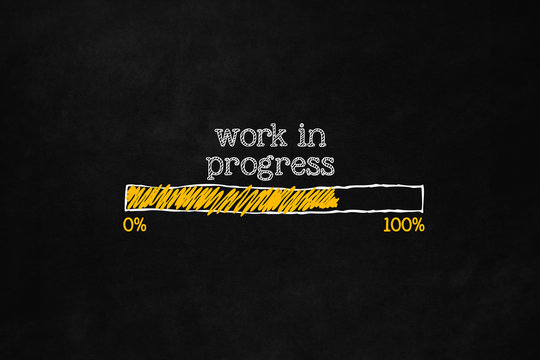